In [1]:
# to put in the first code cell
%reload_ext autoreload
%autoreload 1
# 0 disable all autoreload
# 1 only reload the one imported with %aimport lib
# 2 reload all the modules
# %aimport near0_nonlinear_analysis constants tools

import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import near0_nonlinear_analysis 
import constants as cnt
import near0_quadra_nonlinear
import near0_linear_analysis
import schottky_analysis as sch
import polynomial_fit as pol
import debye_integration as db

## I. Fit direct

Fit direct avec curve fit -> pas satisfaisant entre 0 et 20 K

Beta, Gamma, n, E :  0.5975980634783241 8.616475379830913e-09 0.010175506175793127 9.000007077294152e-23


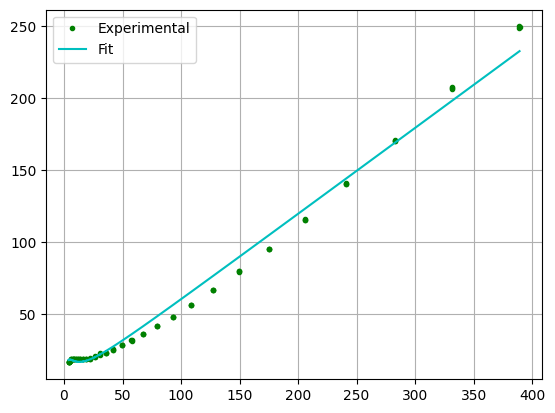

In [37]:
# Non linear fit between 0 K and 20 K

near0_nonlinear_analysis.plot_fit(0,400, cnt.squared_temperature, cnt.C_div_T, cnt.err_sample_HC, bounds= ([0.1, 0, 1e-3, 9e-23],[1, 10, 5e-2, 1.2e-22]))

Beta, Gamma, n, E :  0.4858077222518549 1.5992556105939442 0.010999999999999302 1.1043272257500458e-22


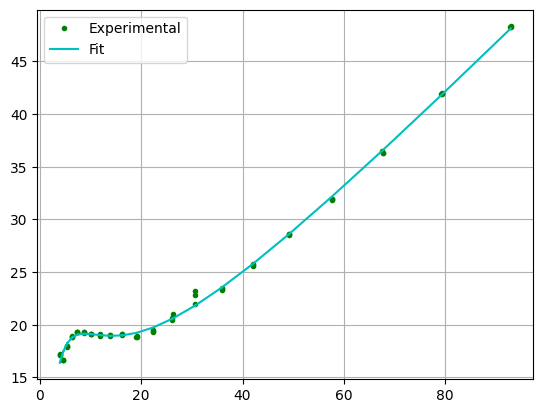

In [4]:
# Non linear fit between 0 K and 10 K

near0_nonlinear_analysis.plot_fit(0,100, cnt.squared_temperature, cnt.C_div_T, cnt.err_sample_HC)

## II. Linear fit

On soustrait Schottky et on ajuste avec une fonction linéaire -> les barres d'erreur sont bien sur la courbe mais pas très satisfaisant

Test avec plusieurs valeurs de E et de n -> les valeurs du fit quadratic sont les meilleures, celles déterminées manuellement sont à oublier

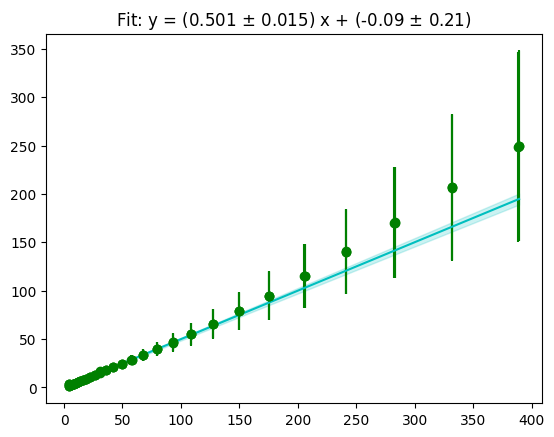

array([ 0.50064496, -0.08502336,  0.01497364,  0.21396035])

In [19]:
# Linear fit between 0 and 20 K
# With the curve fit values of E and n
#near0_linear_analysis.final(0, 400, cnt.E_curve_fit, cnt.n_curve_fit,cnt.temperature, cnt.squared_temperature, cnt.C_div_T)
near0_linear_analysis.final(0, 400, cnt.E_quadratic, cnt.n_quadratic,cnt.temperature, cnt.squared_temperature, cnt.C_div_T)
#near0_linear_analysis.final(0, 400, cnt.E_exp_10, cnt.n_curve_fit,cnt.temperature, cnt.squared_temperature, cnt.C_div_T)

## III. Polynomial fit

Fit avec la fonction codée manuellement, on soustrait Schottky et on fit avec un polynôme de degré 1 ou 2 

Test avec plusieurs valeurs de E et de n -> les valeurs du quadratique fit fonctionnent le mieux 

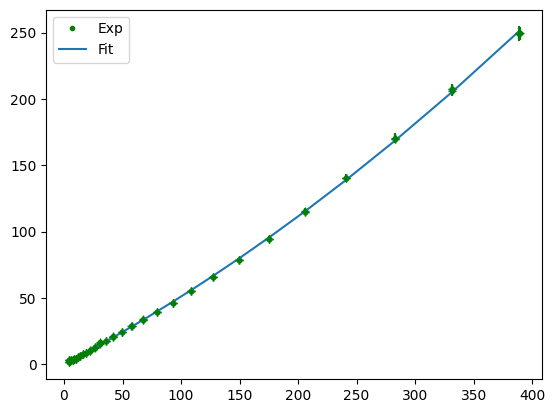

alpha, beta, gamma :  [0.00046898 0.46303904 0.10019545]


In [27]:
# With  polyfit : deg=2

#print("alpha, beta, gamma : ", 
      #pol.poly_fit(0, 20, cnt.temperature, cnt.squared_temperature, cnt.C_div_T, cnt.err_C_divT, cnt.E_curve_fit, cnt.n_curve_fit, deg=2))
print("alpha, beta, gamma : ", 
      pol.poly_fit(0, 20, cnt.temperature, cnt.squared_temperature, cnt.C_div_T, cnt.err_C_divT, cnt.E_quadratic, cnt.n_quadratic, deg=2))


## IV. Quadratic fit

Fit quadratique direct avec les valeurs entre 0 et 20 K (ce qui marche le mieux)

Beta, Gamma, n, E, alpha :  0.46030142536734425 0.3978193675518903 0.012668048215898177 1.153902897249821e-22 0.00047452677198764565


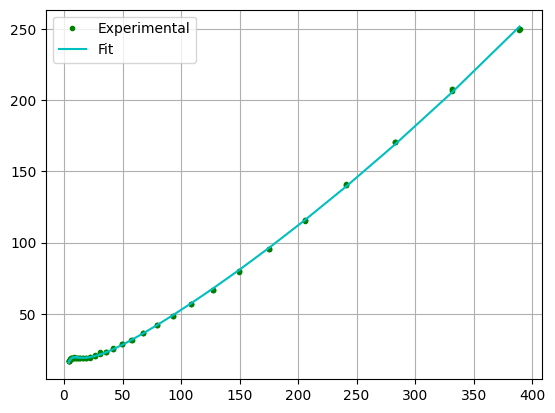

In [30]:
# Between 0 and 20 K

near0_quadra_nonlinear.plot_fit_quadra(0, 400, cnt.squared_temperature, cnt.C_div_T, ([0.1, 0, 1e-3, 9.5e-23, -1 ], [0.7, 5, 2e-2, 1.5e-22, 1]))

## V: Température de Debye

Test avec la valeur intégrée et l'approximation

In [17]:
# With the linear fit 

def debye_temp(beta_exp, temperature) :
    debye_temp = []
    for val in temperature : 
        debye_temp.append(db.debye_temperature_integration(beta_exp, val)[0])
    return np.mean(debye_temp)

temperature_bounded, C_div_t_bounded = tools.tab_interval(cnt.temperature, cnt.C_div_T, 0, 20)


print(db.debye_temperature_integration(0.46030142536734425e-3, 20), cnt.debye_temperature(0.46030142536734425))

(398.1, 0.00046041837450594837) 398.13595669884023


### Manuellement : Test 

Résultat : on ne garde que le fit entre 0 et 20 K

#### 1. 0-20 K : 0.45908394384999723, 0.5403749574781468, 0.012504424308422999, 1.150101516448572e-22, 0.0004769039997925355 

- 0-10 K : ok -1
- 0-15 K : ok 
- 12-20 K : ok

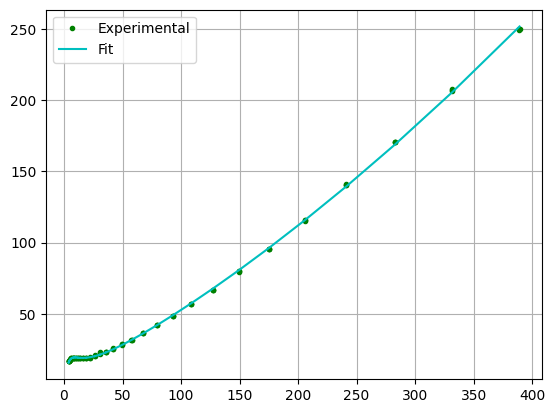

In [48]:
# The 0-20 K values between 0-10 K

quadra_fit = near0_quadra_nonlinear.model_quadra(
    cnt.squared_temperature, 0.45908394384999723, 0.5403749574781468, 0.012504424308422999, 1.150101516448572e-22, 0.0004769039997925355)

x, y = tools.tab_interval(cnt.squared_temperature, quadra_fit, 0, 400)
x, C_div_T_bounded = tools.tab_interval(cnt.squared_temperature,cnt.C_div_T, 0, 400)

plt.figure()
plt.plot(x,C_div_T_bounded, "g.", label="Experimental")
plt.plot(x, y, "c-", label="Fit")
plt.grid(True)
plt.legend()

### Manuellement : Test avec gamma le plus petit possible 

#### 1.  0.46318268614826286 0.06319440532206101 0.012979953809295845 1.1584047800714808e-22 0.00046894875156273756

- 12-20 K : ok
- 0- 10 K : ok-1


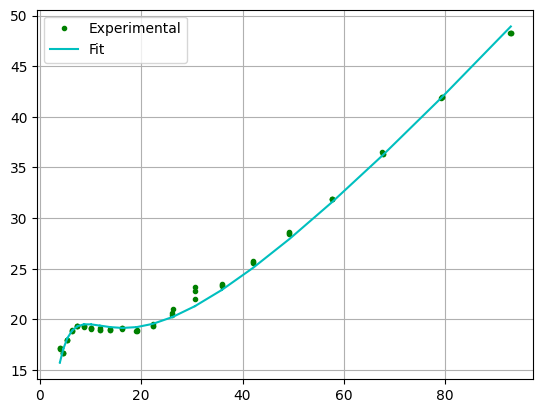

In [52]:
quadra_fit = near0_quadra_nonlinear.model_quadra(
    cnt.squared_temperature,0.46318268614826286, 0.06319440532206101, 0.012979953809295845, 1.1584047800714808e-22, 0.00046894875156273756)

x, y = tools.tab_interval(cnt.squared_temperature, quadra_fit, 0, 100)
x, C_div_T_bounded = tools.tab_interval(cnt.squared_temperature,cnt.C_div_T, 0, 100)

plt.figure()
plt.plot(x,C_div_T_bounded, "g.", label="Experimental")
plt.plot(x, y, "c-", label="Fit")
plt.grid(True)
plt.legend()

#### 2. 0.46375242488814894 6.354547584783215e-06 0.013048783009520091 1.159776378507051e-22 0.0004678029962558954

- 0-10 K : ok
- 12-20 K : ok


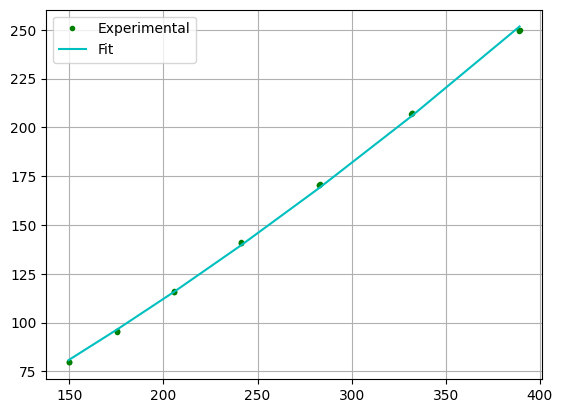

In [58]:
quadra_fit = near0_quadra_nonlinear.model_quadra(
    cnt.squared_temperature,0.46375242488814894, 6.354547584783215e-06, 0.013048783009520091, 1.159776378507051e-22, 0.0004678029962558954)

x, y = tools.tab_interval(cnt.squared_temperature, quadra_fit, 144, 400)
x, C_div_T_bounded = tools.tab_interval(cnt.squared_temperature,cnt.C_div_T, 144, 400)

plt.figure()
plt.plot(x,C_div_T_bounded, "g.", label="Experimental")
plt.plot(x, y, "c-", label="Fit")
plt.grid(True)
plt.legend()